In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
%autosave 60

Autosaving every 60 seconds


# DSCI 235 Final Project
### By: Blake Davis and Elisabeth Ball

Data Source 1: https://www.kaggle.com/datasets/aliaamiri/2020-summer-olympics-dataset?select=2020_Olympics_Dataset.csv <br>
Data Source 2: https://www.kaggle.com/datasets/rio2016/olympic-games <br>
GitHub: https://github.com/bdavis12302/2020-2016-Summer-Olympic-Data <br>

## Project Description

For this project, we are analyzing data from the Tokyo 2020 Olympics and the Rio 2016 Olympics. The Olympic Games are a fascinating event, bringing the world together to appreciate excellence in athletics. The numerous different events, countries, and people competing in the Olympic Games give ample material to analyze. Finding patterns and interesting information in this Olympic data will likely change the way we see the games in the future and make us think about the nature of sports in a new way. This project will also be challenging and help us develop our teamwork, communication, and data wrangling skills. <br>

We are using 2 .csv files for our project. We have a main data set that is for the 2020 Summer Olympics in Tokyo. It includes data sorted by athlete name, with information on each athlete including age, country, sport, event, rank, and medal earned. The data set has multiple entries for each athlete as many athletes compete in multiple events. We have not decided how we are going to sort/filter the data for each individual athlete as they are each in the data set multiple times. We will use a 2016 Olympics in Rio De Janeiro data set to be able to determine if there were any repeat medalists and if there were more female or male medalists in 2016 vs. 2020. <br>

<hr>

We want to answer a few questions about the athletes that chose to compete in the 2016 and 2020 Summer Olympics:
1. What is the average age of an Olympic athlete in 2016? 2020? Compare.
   - Are there events that tend to have older compeditors? Meaning, is the mean age of athletes competing an a specific event greater than 30?<br>
6. Who are the 5 oldest athletes and who are the 5 youngest athletes in 2020?
   - What country are they from? <br>
   - What sport do they compete in? What is the age distribution of their sport in 2020? <br>
   - Did any of these athletes compete in 2016?
   - Do any of them compete in the events that tend to have older compeditors?
3. What are the top medaling countries in 2016? 2020? Compare. <br>
4. Does the United States have more female or male medalists in 2020? <br>
5. Which Olympic athlete has the most medals in 2016? 2020?
   - Is it the same person each Olympics? Same event? <br>

In [2]:
olympics2020 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2020_Olympics_Dataset.csv', encoding='latin-1')
olympics2016 = pd.read_csv('https://raw.githubusercontent.com/bdavis12302/2020-2016-Summer-Olympic-Data/main/SummerOlympicDatasets/2016_athletes.csv', encoding='latin-1')
olympics2016

,id,name,nationality,sex,dob,height,weight,sport,gold,silver,bronze
0,736041664,A Jesus Garcia,ESP,male,10/17/69,1.72,64.0,athletics,0,0,0
1,532037425,A Lam Shin,KOR,female,9/23/86,1.68,56.0,fencing,0,0,0
2,435962603,Aaron Brown,CAN,male,5/27/92,1.98,79.0,athletics,0,0,1
3,521041435,Aaron Cook,MDA,male,1/2/91,1.83,80.0,taekwondo,0,0,0
4,33922579,Aaron Gate,NZL,male,11/26/90,1.81,71.0,cycling,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
11533,265605954,Zurian Hechavarria,CUB,female,8/10/95,1.64,58.0,athletics,0,0,0
11534,214461847,Zuzana Hejnova,CZE,female,12/19/86,1.73,63.0,athletics,0,0,0
11535,88361042,di Xiao,CHN,male,5/14/91,1.85,100.0,wrestling,0,0,0
11536,900065925,le Quoc Toan Tran,VIE,male,4/5/89,1.60,56.0,weightlifting,0,0,0


## Part 1: What is the average age of an Olympic athlete in 2016? 2020? Compare

In [3]:
avgAge20 = olympics2020['Age'].mean()
avgAge20

26.765227167515377

In [8]:
olympics2016.loc[8546,'dob'] = "12/25/87" #Had to Google this guy's birthday because it was missing from the dataset
startDate2016 = pd.to_datetime("08/05/16")

olympics2016['dob'] = pd.to_datetime(olympics2016['dob'])
olympics2016['dob'] = np.where(olympics2016['dob'].dt.year > 2022, olympics2016['dob'] - pd.offsets.DateOffset(years=100), olympics2016['dob'])
# For some reason unknown, python decided that 2071 was somehow in the past, so we had to force it to go to 1971
olympics2016['age'] = abs(olympics2016['dob'] - startDate2016)
olympics2016['age'] = (np.floor((olympics2016['age'].dt.days)/365)).astype(int)
avgAge16 = olympics2016['age'].mean()
avgAge16

26.33974692321026

### Are there events that tend to have older compeditors? 

In [5]:
meanAgeSport2016 = olympics2016.groupby("sport")["age"].mean() # Graph this
meanAgeSport2020 = olympics2020.groupby("Sport")["Age"].mean() # Graph this
ageGT302016 = meanAgeSport2016[meanAgeSport2016 > 30]
ageGT302020 = meanAgeSport2020[meanAgeSport2020 > 30]
print("Sports with an average (mean) age that is greater than 30 in 2016:", ageGT302016)
print("Sports with an average (mean) age that is greater than 30 in 2020:", ageGT302020)

Sports with an average (mean) age that is greater than 30 in 2016: sport
equestrian    37.261261
shooting      31.369231
Name: age, dtype: float64
Sports with an average (mean) age that is greater than 30 in 2020: Sport
Beach Volleyball    30.052083
Equestrian          38.097619
Shooting            30.097054
Name: Age, dtype: float64


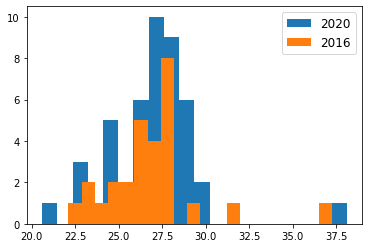

In [6]:
%matplotlib inline
num_bins=20
plt.hist(meanAgeSport2020, num_bins, label='2020')
plt.hist(meanAgeSport2016, num_bins, label='2016')
# Graphed in this order so that the 2016 would sit on top of 2020.
plt.legend(loc='upper right', fontsize='12');

## Part 2: Who are the 5 oldest athletes and who are the 5 youngest athletes in 2020?

In [82]:
olympics2020SortedByAge = olympics2020.sort_values(by="Age", ascending = False)
olympics2016SortedByAge = olympics2016.sort_values(by="age", ascending = False)
print("The five oldest athletes in the 2016 summer olympics are:\n", olympics2016SortedByAge.loc[:,('name','sport','age')].head(5),'\n')
print("The five oldest athletes in the 2020 summer olympics are:\n", olympics2020SortedByAge.loc[:,('Name','Sport','Age')].head(5))
#TODO: Remove Duplicates for 2020, cause it's the same athlete...

The five oldest athletes in the 2016 summer olympics are:
                  name       sport  age
5299   Julie Brougham  equestrian   62
7092       Mary Hanna  equestrian   61
5045    John Whitaker  equestrian   61
10185   Suzanne Hearn  equestrian   60
6982        Mark Todd  equestrian   60 

The five oldest athletes in the 2020 summer olympics are:
                Name       Sport  Age
4979     HANNA Mary  Equestrian   66
4980     HANNA Mary  Equestrian   66
5506     HOY Andrew  Equestrian   62
5507     HOY Andrew  Equestrian   62
10490  PINTO Carlos  Equestrian   61


### Show the Age distribution of athletes in the 2016 and 2020 Summer Olympics'.

<AxesSubplot:title={'center':'Age distribution of athletes in the 2016 Summer Olympics'}>

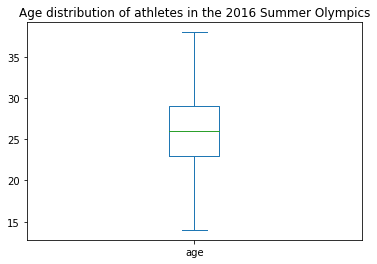

In [55]:
olympics2016AgeSorted = olympics2016SortedByAge["age"]
olympics2016AgeSorted.plot.box(showfliers=False, title="Age distribution of athletes in the 2016 Summer Olympics")

<AxesSubplot:title={'center':'Age distribution of athletes in the 2020 Summer Olympics'}>

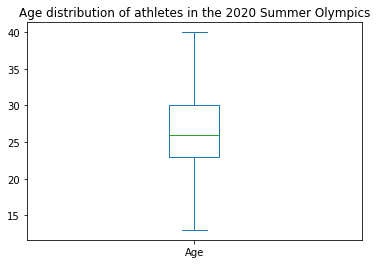

In [56]:
olympics2020AgeSorted = olympics2020SortedByAge["Age"]
olympics2020AgeSorted.plot.box(showfliers=False, title="Age distribution of athletes in the 2020 Summer Olympics")